<div style="display: flex;">
    <div style="flex: 1;">
        <h1>Análisis Exploratorio de Datos 2023</h1>
        <h2>U2 - 2A</h2>
        <h3>Preprocesamiento de datos</h3>
        <p><strong>Nombre:</strong> David Aaron Ramirez Olmeda<br>
        <strong>Programa:</strong> Maestría en Ciencia de Datos e Información</p>
    </div>
    <img src="https://scontent.fcul2-1.fna.fbcdn.net/v/t39.30808-6/357432505_662449529254685_507850031498699830_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=a2f6c7&_nc_ohc=zA3I9zhyHv4AX8TCrcY&_nc_ht=scontent.fcul2-1.fna&oh=00_AfDeLgk4kat2vYRN_LSBQS6QbGn5FQ7lkiSOcL7FgyuHUA&oe=6503D8CA" alt="Imagen de Portada" width="170" height="170">
</div>

**Introducción:**

En el contexto de un análisis de datos nos encontramos con la presencia de datos faltantes en el conjunto de datos de "palmerpenguins". La gestión adecuada de estos valores ausentes es fundamental para garantizar la integridad y la precisión de nuestros resultados. Se presenta un enfoque para abordar y corregir estos datos faltantes, junto con el uso de visualizaciones para mejorar la comprensión de los datos.


In [6]:
# !pip install palmerpenguins # solo ejetuar la primera vez
from palmerpenguins import load_penguins
data=load_penguins() # Obtenemos un dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Eliminamos 'year'
data = data.drop(columns=['year'])

In [3]:
# Verificamos si hay datos nulos en el DataFrame
null_counts = data.isnull().sum()
null_counts_table = pd.DataFrame({'Columna': null_counts.index, 'Nulos': null_counts.values})
print(null_counts_table)

             Columna  Nulos
0            species      0
1             island      0
2     bill_length_mm      2
3      bill_depth_mm      2
4  flipper_length_mm      2
5        body_mass_g      2
6                sex     11


In [4]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Estrategia para Completar/Corregir Datos Faltantes/Erróneos:

Después de revisar rápidamente los datos nulos y de usar describe() en nuestro df, tenemos una idea de cómo se ven nuestros datos.

Para las características numéricas:
La mejor estrategia sería rellenar los datos faltantes con la media de la columna correspondiente. Esto se debe a que los valores faltantes son numéricos y, en general, llenarlos con la media es una opción razonable. 

Para la característica categórica (sex):
En el caso de 'sex', que es una variable categórica, podemos considerar rellenar los datos faltantes con el valor más común (la moda) si existe una categoría que se repite con mayor frecuencia. 

Razonamiento:
Para las características numéricas, llenar con la media es una estrategia sensata, ya que los valores faltantes pueden considerarse como valores atípicos o simplemente datos que faltan por azar. La imputación con la media mantiene la consistencia de los datos.

Para la característica categórica (sex), depende de la distribución de valores. Si hay una categoría dominante, llenar con esa categoría es una opción razonable. Si no se puede determinar de manera confiable, mantener los valores como "desconocidos" es una estrategia prudente para evitar introducir sesgos en los datos.

In [7]:
# Estrategia 1: Completar datos faltantes en características numéricas con la media
numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for feature in numeric_features:
    data[feature].fillna(data[feature].mean(), inplace=True)

# Estrategia 2: Completar datos faltantes en 'sex' con la moda (valor más común)
data['sex'].fillna(data['sex'].mode()[0], inplace=True)

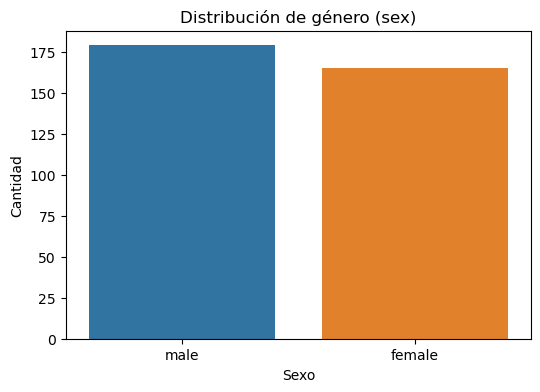

In [9]:
# Diagrama de barras para la característica categórica 'sex'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='sex')
plt.title('Distribución de género (sex)')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

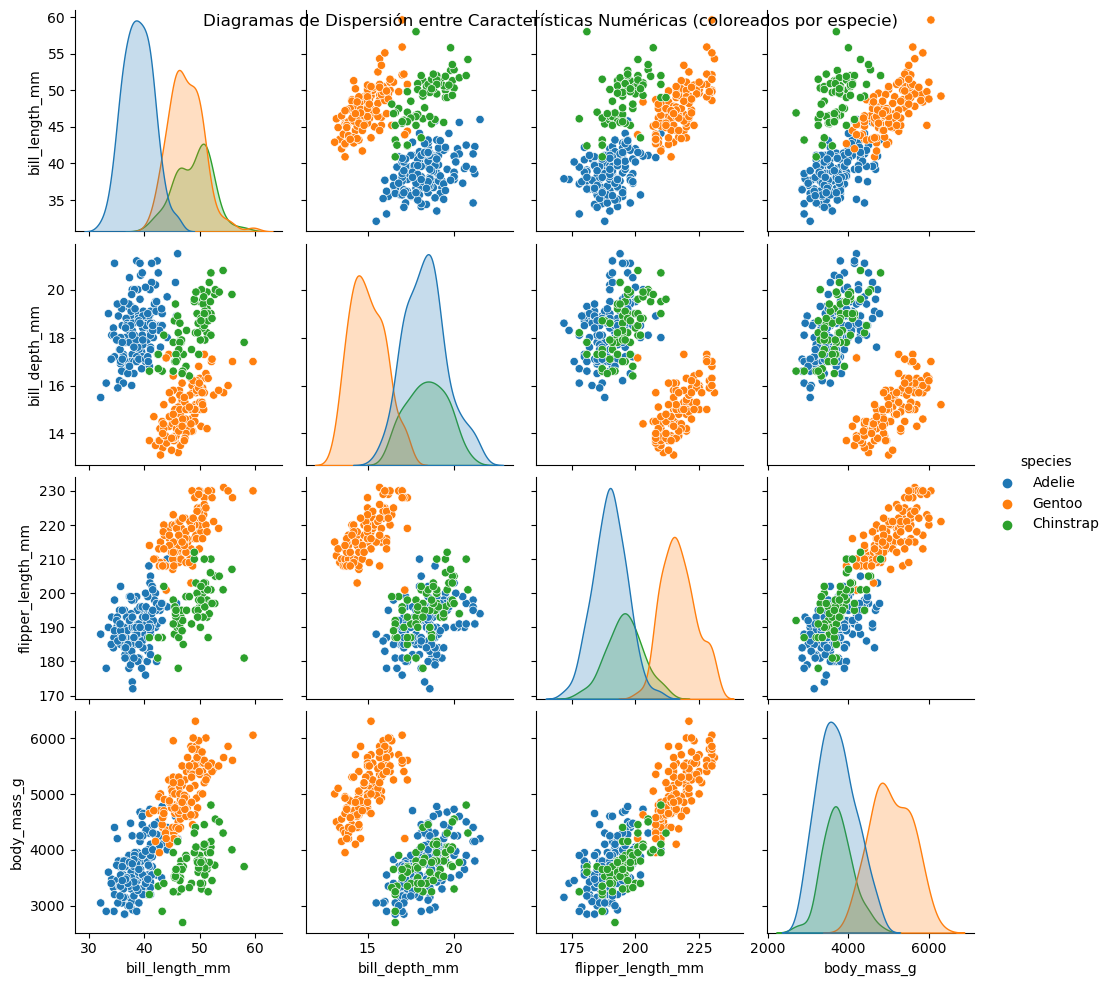

In [10]:
# Diagramas de dispersión para características numéricas
sns.pairplot(data=data, hue='species', vars=numeric_features)
plt.suptitle('Diagramas de Dispersión entre Características Numéricas (coloreados por especie)')
plt.show()

**Conclusiones:**

Se implementaron estrategias de imputación para abordar los datos faltantes en el conjunto de datos, se utilizó la media para completar los datos faltantes en las características numéricas y la moda para la característica categórica "sex". Estas estrategias se seleccionaron cuidadosamente en función de la naturaleza de los datos y su impacto en el análisis. Además, se generaron visualizaciones, como histogramas, gráficos de barras y diagramas de dispersión, que proporcionaron una mayor comprensión de la distribución de los datos y las relaciones entre las características.

**Referencias:**

Para obtener detalles adicionales sobre técnicas de imputación de datos en Pandas, se recomienda consultar la [documentacion](https://pandas.pydata.org/docs/user_guide/missing_data.html#interpolation)

https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/